# PSF eigenvalue

The objective is to calculate eigenvalue of a PSF matrix.

In [1]:
using Revise

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1273


In [2]:
using PyPlot, LinearAlgebra
pygui(false)

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


false

In [3]:
include("psfeig.jl")
include("utils.jl")

Main.utils

## Reading Modeled PSFs

In [96]:
path = "/home/bruno/Work/Luana_PSF/psfs_su5_size71/all_psfs_su5_size71_com_ph_interp.rsf@"
image = utils.read_bin(path,960,5300);

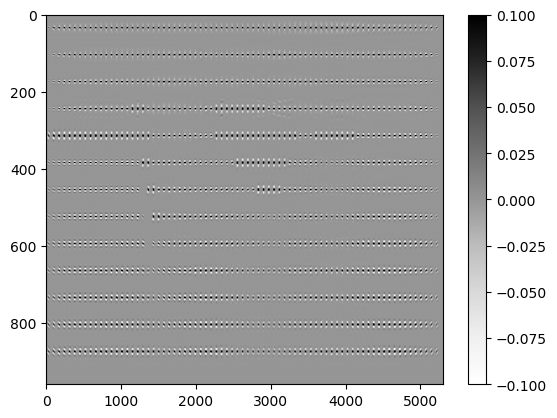

In [97]:
utils.sisshow(image, vmin=-0.1, vmax=0.1)

In [98]:
b1=70; b2=70; k1=36; k2=36; l1=920; l2=5260;
println("psf grid: ($(length(k1:b1:l1)),$(length(k2:b2:l2)))")
psfs = psfeig.psf_chop(image,b1,b2,k1,k2,l1,l2);

psf grid: (13,75)


In [99]:
size(psfs.val,3)

975

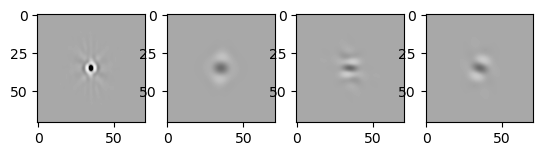

In [100]:
utils.sisshow(psfs.val[:,:,9*13+1], psfs.val[:,:,9*13+5], psfs.val[:,:,9*13+9], psfs.val[:,:,9*13+13], perc=99.9)

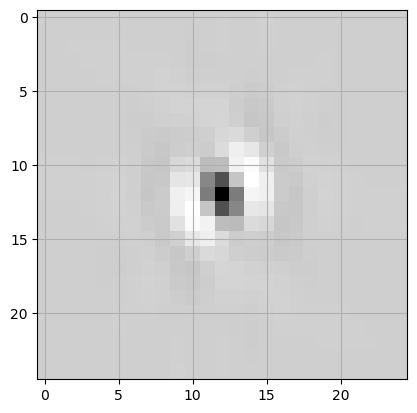

In [11]:
o=36; l=12
imshow(psfs.val[(o-l):(o+l),(o-l):(o+l),1], cmap="Greys")
grid()

In [12]:
size(psfs.val[(o-l):(o+l),(o-l):(o+l),1])

(25, 25)

In [13]:
findmax(psfs.val[(o-l):(o+l),(o-l):(o+l),1])

(3.3668396f0, CartesianIndex(13, 13))

## Eigenvalues of Modeled PSFs

In [101]:
function plot_psf_with_condition_number(ipsf)
    P = psfs.val[(o-l):(o+l),(o-l):(o+l),ipsf];
    G = psfeig.psf_to_matrix(n,P);
    figure()
    imshow(psfs.val[(o-l):(o+l),(o-l):(o+l),ipsf],
            interpolation="bicubic", cmap="Greys", vmin=-1, vmax=1)
    colorbar()
    grid()
    title("PSF #$(ipsf): condition number = $(cond(G))")  
end

plot_psf_with_condition_number (generic function with 1 method)

**Distict PSFs**

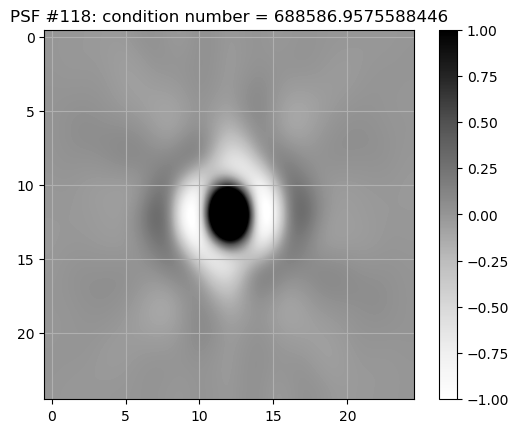

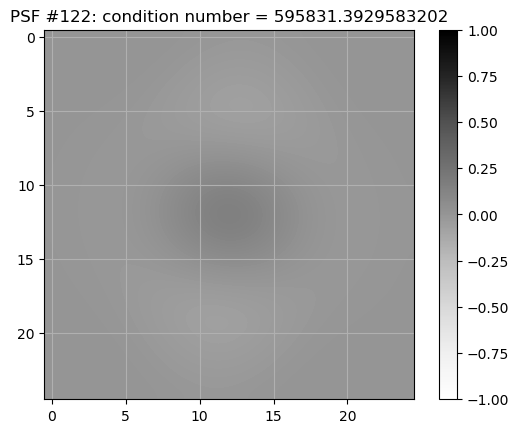

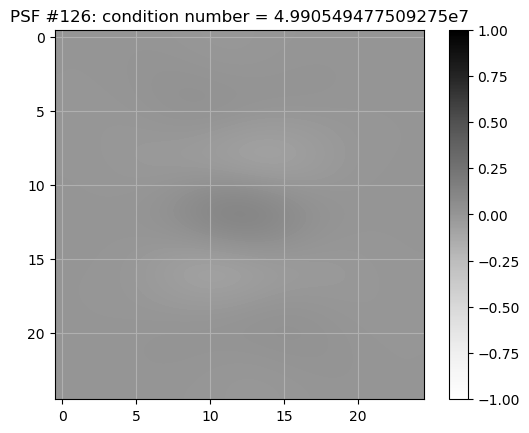

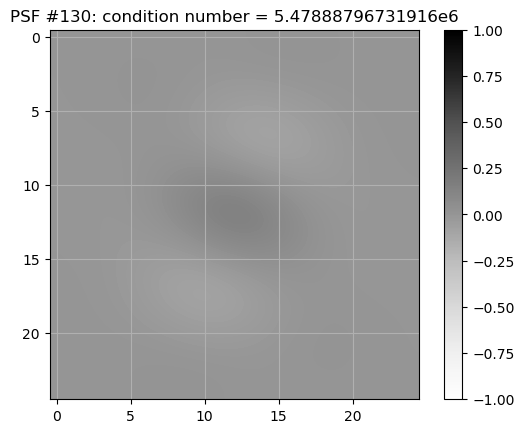

In [15]:
o=36; l=12; n=25; 

for ipsf in [9*13+1, 9*13+5, 9*13+9, 9*13+13]
    plot_psf_with_condition_number(ipsf)
end

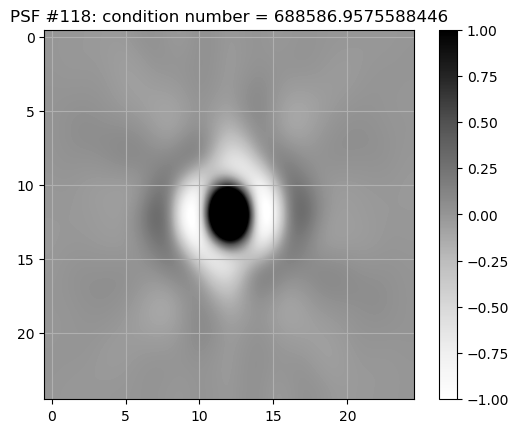

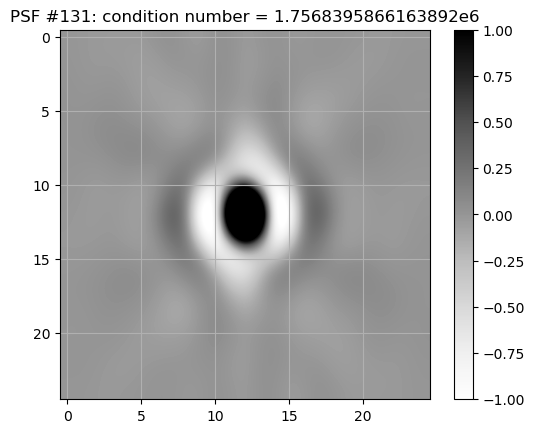

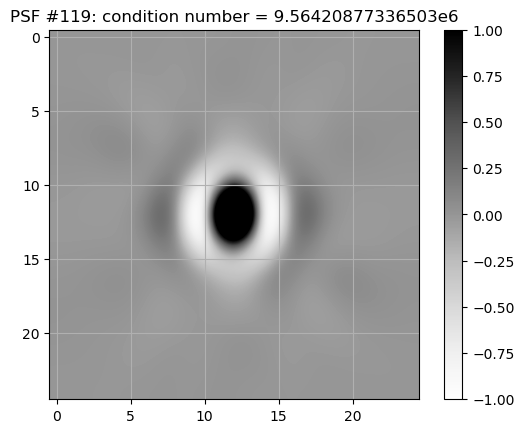

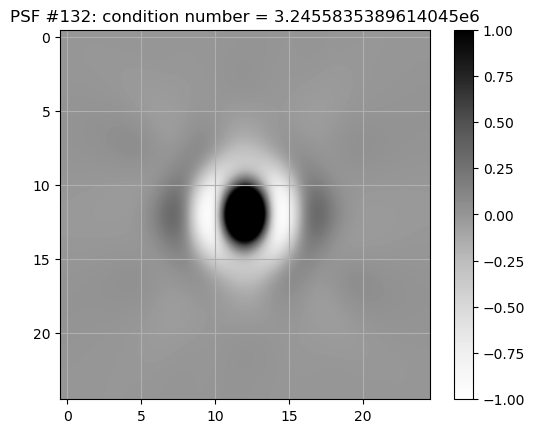

In [17]:
o=36; l=12; n=25;

for ipsf in [9*13+1, 10*13+1, 9*13+2, 10*13+2]
    plot_psf_with_condition_number(ipsf)
end

## Eigenvalues of 4x4 PSFs

**Distinct PSFs**

In [102]:
o=36; l=12; n = 100

P1 = psfs.val[(o-l):(o+l),(o-l):(o+l), 9*13+1];
P2 = psfs.val[(o-l):(o+l),(o-l):(o+l), 9*13+5];
P3 = psfs.val[(o-l):(o+l),(o-l):(o+l), 9*13+9];
P4 = psfs.val[(o-l):(o+l),(o-l):(o+l), 9*13+13];


In [103]:
G = psfeig.psf_to_matrix(n,P1,P2,P3,P4); varinfo(r"G")

| name |        size | summary                      |
|:---- | -----------:|:---------------------------- |
| G    | 762.939 MiB | 10000×10000 Array{Float64,2} |


In [27]:
cond(G)

3.152389269824061e8

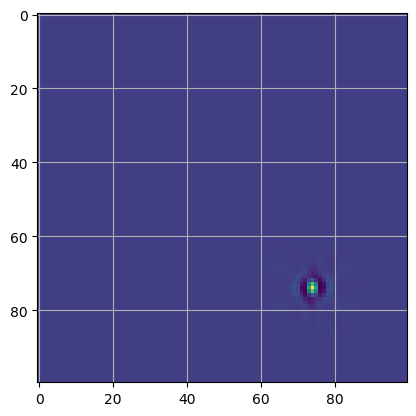

In [28]:
imshow(reshape(G[(75-1)*100+75,:],100,100)); grid()

**Neighbour PSFs**

In [56]:
o=36; l=12; n = 100

P1 = psfs.val[(o-l):(o+l),(o-l):(o+l),  9*13+1];
P2 = psfs.val[(o-l):(o+l),(o-l):(o+l), 10*13+1];
P3 = psfs.val[(o-l):(o+l),(o-l):(o+l),  9*13+2];
P4 = psfs.val[(o-l):(o+l),(o-l):(o+l), 10*13+2];


In [57]:
G = psfeig.psf_to_matrix(n,P1,P2,P3,P4); varinfo(r"G")

| name |        size | summary                      |
|:---- | -----------:|:---------------------------- |
| G    | 762.939 MiB | 10000×10000 Array{Float64,2} |


In [31]:
cond(G)

1.8344483898310825e7

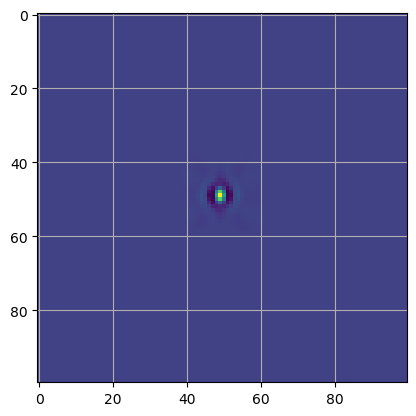

In [32]:
imshow(reshape(G[(50-1)*100+50,:],100,100)); grid()

## PSF Eigenvalue Developmment

In [39]:
n = 25;
P = psfeig.bluker(12,1.0);

In [107]:
G = psfeig.psf_to_matrix(n,P); varinfo(r"G")
G2 = psfeig.psf_to_matrix(n,P,P,P,P); varinfo(r"G2")
G3 = psfeig.psf_to_matrix(n,P,0.5*P,0.2*P,0.1*P); varinfo(r"G3")

| name |      size | summary                  |
|:---- | ---------:|:------------------------ |
| G3   | 2.980 MiB | 625×625 Array{Float64,2} |


In [109]:
cond(G)

4167.911018197733

In [110]:
cond(G2)

4167.911018197979

In [111]:
cond(G3)

11380.202021198646

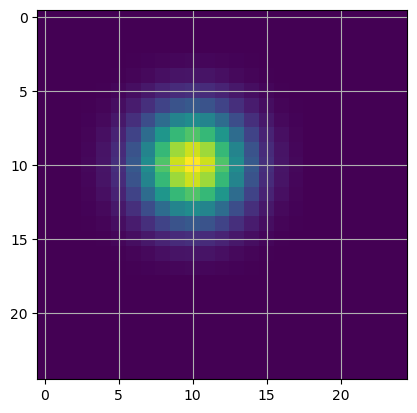

In [105]:
imshow(reshape(G[(11-1)*25+11,:],25,25)); grid()

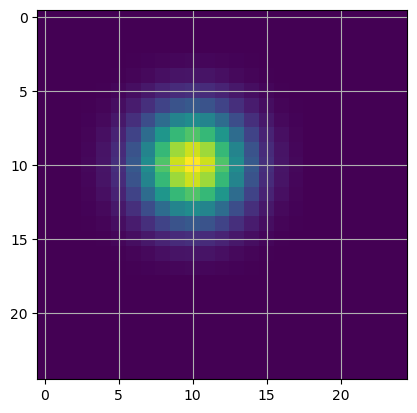

In [103]:
imshow(reshape(G4[(11-1)*25+11,:],25,25)); grid()

In [40]:
imshow(P)

PyObject <matplotlib.image.AxesImage object at 0x7fbe251ea410>

In [41]:
findmax(P)

(0.15915494309189535, CartesianIndex(13, 13))

In [42]:
size(P)

(25, 25)

## Eigenvalue Timing

| $n$ | Time | Size  |
|:---:|:----:|:-----:|
|  64 | 27s  | 128Mb |
|  96 | 162s | 324Mb   |

In [36]:
n=100; x = rand(Float32, n*n,n*n); varinfo(r"x")

| name |        size | summary                      |
|:---- | -----------:|:---------------------------- |
| x    | 381.470 MiB | 10000×10000 Array{Float32,2} |


In [83]:
@time v = eigvals(x);

165.460979 seconds (899.31 k allocations: 428.171 MiB, 0.01% gc time)


In [84]:
x = nothing

In [85]:
GC.gc()

## Evaluate the condition number of blur matrix

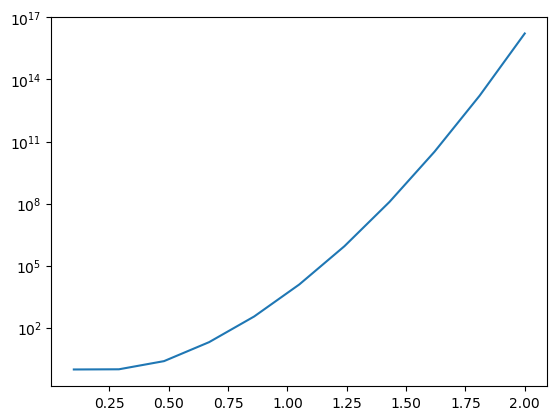

 47.223515 seconds (81.13 k allocations: 1.044 GiB, 0.16% gc time)


In [35]:
N = 50;
k = 12;

nn = 11;
c = zeros(nn);
sigma = range(0.1, stop=2.0, length=nn);
@time for i = 1:nn
    P = psfeig.bluker(k,sigma[i]);
    G = psfeig.psf_to_matrix(N,P);
    c[i] = cond(G);
end

semilogy(sigma,c);

## Gulfaks Reflectivity

In [22]:
using FileIO

In [53]:
gulfacks = load(File(format"PNG", "gulfacks.png"));
refl = [ Float32(gulfacks[i,j].r) for i=1:100,j=1:100];

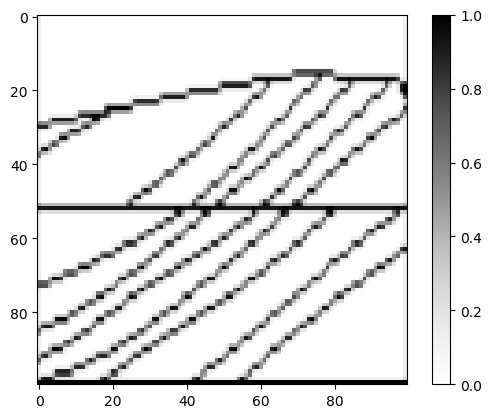

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3a8a433f10>

In [43]:
imshow([refl[i,j].r for i=1:100,j=1:100], cmap="Greys")
colorbar()

In [62]:
function hprod(G,r)
    n1,n2 = size(r)
    m1,m2 = size(G)
    @assert(m1 == n1*n2, "Hessian and reflectivity are not compatible")
    return reshape(G*reshape(r,n1*n2),n1,n2)
end

function hinv(G,r)
    n1,n2 = size(r)
    m1,m2 = size(G)
    @assert(m1 == n1*n2, "Hessian and reflectivity are not compatible")
    return reshape(G \ reshape(r,n1*n2),n1,n2)
end

hinv (generic function with 1 method)

In [69]:
hr = hprod(G,refl);

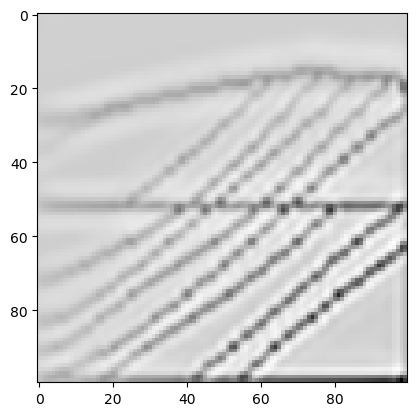

PyObject <matplotlib.image.AxesImage object at 0x7f3a8a6fbfd0>

In [55]:
imshow(hr, cmap="Greys")

In [105]:
hr = hprod(G,refl);

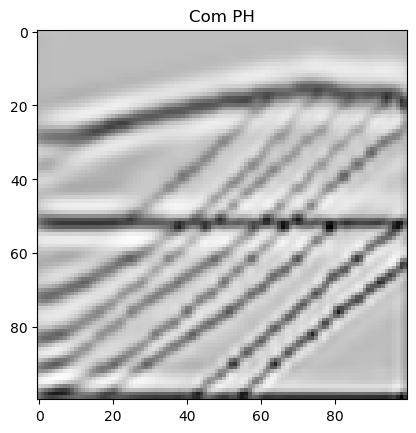

PyObject Text(0.5, 1, 'Com PH')

In [106]:
imshow(hr, cmap="Greys"); title("Com PH")

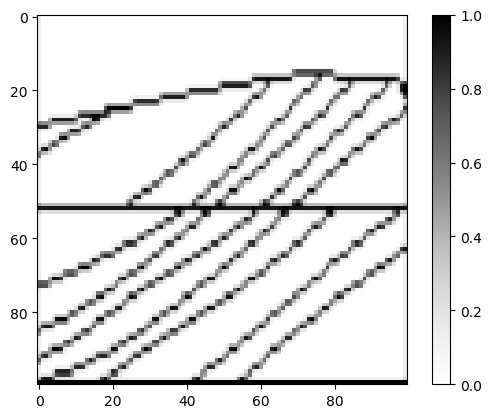

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3a8a304510>

In [70]:
refl_inv = hinv(G,hr);
imshow(refl_inv, cmap="Greys"); colorbar()

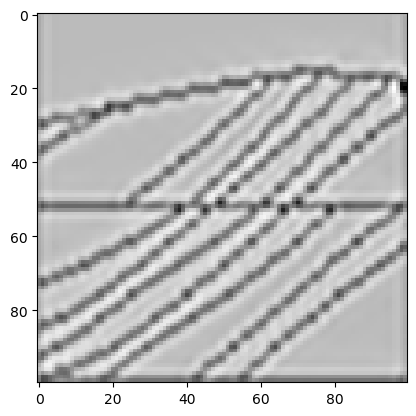

PyObject <matplotlib.image.AxesImage object at 0x7f3a8a4422d0>

In [58]:
hr = hprod(G,refl);
imshow(hr, cmap="Greys")

In [63]:
refl_inv = hinv(G,hr);
imshow(refl_inv, cmap="Greys"); colorbar();

100×100 Array{Float64,2}:
 0.12549    1.48024e-11  -3.15238e-11  …   1.73618e-12  -1.27932e-12  0.12549
 0.12549   -3.07931e-11   6.98919e-11     -1.797e-12     9.49101e-13  0.12549
 0.12549    2.7429e-11   -6.22348e-11     -1.13687e-13   2.31988e-12  0.12549
 0.12549   -6.03352e-12  -3.23145e-12     -1.16895e-12  -4.61284e-12  0.12549
 0.12549   -4.24967e-12   7.16542e-11      3.14014e-12   5.59086e-12  0.12549
 0.12549   -1.79864e-11  -8.82675e-11  …  -7.41961e-12  -2.22851e-12  0.12549
 0.12549    8.68955e-11   9.75597e-12      4.20678e-12   4.44889e-14  0.12549
 0.12549   -1.57936e-10   9.27099e-11      1.15617e-12   1.33211e-12  0.12549
 0.12549    1.69316e-10  -1.03901e-10     -3.32198e-12  -1.86793e-12  0.12549
 0.12549   -1.18314e-10   1.58127e-11      2.36034e-13   2.06915e-12  0.12549
 0.12549    5.25272e-11   8.37207e-11  …   4.20772e-12  -1.59966e-12  0.12549
 0.12549   -1.71067e-11  -1.14184e-10     -6.94803e-12   1.66057e-12  0.12549
 0.12549    2.64775e-11   5.17066e-11 

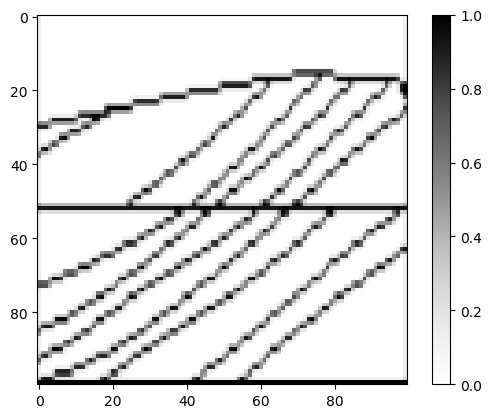

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3a8a19f6d0>

In [72]:
using IterativeSolvers

┌ Info: Precompiling IterativeSolvers [42fd0dbc-a981-5370-80f2-aaf504508153]
└ @ Base loading.jl:1273


In [90]:
refl_inv = lsqr(G, hr[:], maxiter=100, verbose=true);

=== lsqr ===
iter	resnorm		  anorm		  cnorm		  rnorm
  1	8.04e+01	9.47e-01	2.69e-01	6.60e-01
  2	6.30e+01	3.96e-01	1.04e-01	5.17e-01
  3	5.13e+01	3.21e-01	6.46e-02	4.21e-01
  4	4.23e+01	2.50e-01	4.55e-02	3.47e-01
  5	3.68e+01	2.05e-01	3.48e-02	3.02e-01
  6	3.18e+01	1.66e-01	2.79e-02	2.61e-01
  7	2.81e+01	1.36e-01	2.35e-02	2.31e-01
  8	2.50e+01	1.20e-01	2.03e-02	2.05e-01
  9	2.20e+01	1.09e-01	1.79e-02	1.81e-01
 10	1.94e+01	9.91e-02	1.60e-02	1.59e-01
 11	1.75e+01	8.76e-02	1.45e-02	1.44e-01
 12	1.62e+01	9.03e-02	1.31e-02	1.33e-01
 13	1.50e+01	8.87e-02	1.19e-02	1.23e-01
 14	1.40e+01	7.57e-02	1.09e-02	1.15e-01
 15	1.30e+01	6.52e-02	1.00e-02	1.07e-01
 16	1.23e+01	6.40e-02	9.34e-03	1.01e-01
 17	1.14e+01	5.74e-02	8.70e-03	9.35e-02
 18	1.07e+01	5.74e-02	8.17e-03	8.79e-02
 19	1.02e+01	5.40e-02	7.68e-03	8.34e-02
 20	9.59e+00	4.53e-02	7.25e-03	7.87e-02
 21	9.11e+00	4.52e-02	6.87e-03	7.48e-02
 22	8.67e+00	4.23e-02	6.53e-03	7.11e-02
 23	8.27e+00	3.85e-02	6.22e-03	6.79e-02
 24	7.92e+00	3.83e-02	5.93e

In [107]:
refl_inv = lsqr(G, hr[:], maxiter=100, verbose=true);

=== lsqr ===
iter	resnorm		  anorm		  cnorm		  rnorm
  1	1.27e+02	5.93e-01	2.19e-01	5.97e-01
  2	8.75e+01	4.30e-01	1.03e-01	4.13e-01
  3	6.14e+01	2.84e-01	6.66e-02	2.90e-01
  4	4.86e+01	2.36e-01	4.91e-02	2.29e-01
  5	3.88e+01	2.07e-01	3.81e-02	1.83e-01
  6	3.30e+01	2.02e-01	3.07e-02	1.56e-01
  7	2.88e+01	1.45e-01	2.52e-02	1.36e-01
  8	2.51e+01	1.27e-01	2.16e-02	1.18e-01
  9	2.23e+01	1.12e-01	1.89e-02	1.05e-01
 10	2.01e+01	1.02e-01	1.67e-02	9.47e-02
 11	1.80e+01	8.78e-02	1.50e-02	8.48e-02
 12	1.66e+01	8.23e-02	1.36e-02	7.82e-02
 13	1.53e+01	7.48e-02	1.24e-02	7.21e-02
 14	1.42e+01	7.01e-02	1.14e-02	6.68e-02
 15	1.34e+01	7.28e-02	1.05e-02	6.31e-02
 16	1.27e+01	6.60e-02	9.63e-03	5.97e-02
 17	1.19e+01	5.80e-02	8.92e-03	5.60e-02
 18	1.11e+01	5.23e-02	8.36e-03	5.25e-02
 19	1.05e+01	5.18e-02	7.85e-03	4.96e-02
 20	9.99e+00	5.08e-02	7.39e-03	4.71e-02
 21	9.53e+00	4.63e-02	6.97e-03	4.50e-02
 22	9.06e+00	4.48e-02	6.59e-03	4.28e-02
 23	8.65e+00	4.18e-02	6.26e-03	4.08e-02
 24	8.23e+00	3.98e-02	5.95e

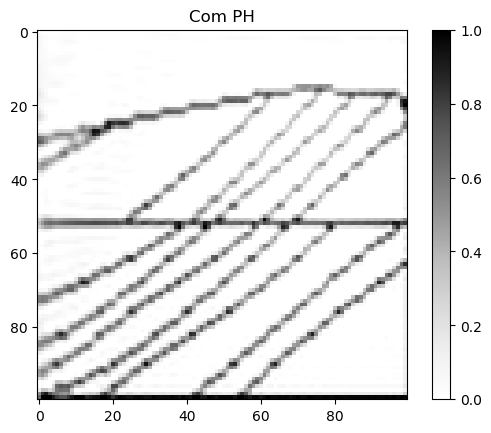

PyObject Text(0.5, 1, 'Com PH')

In [108]:
imshow(reshape(refl_inv,100,100), cmap="Greys", vmin=0, vmax=1); colorbar(); title("Com PH")

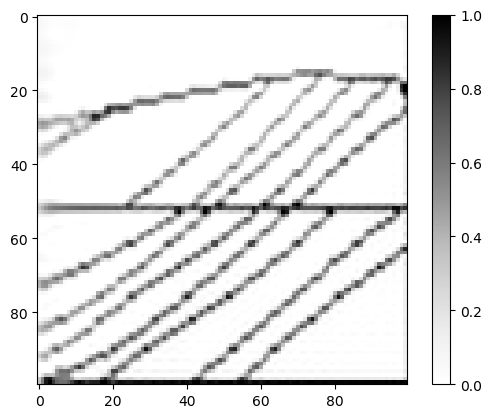

In [93]:
imshow(reshape(refl_inv,100,100), cmap="Greys", vmin=0, vmax=1); colorbar();